# Text Analysis in Arabic Tweets

6,000 tweets were downloaded from Twitter using Tweepy in three batches of 2,000 that were found using three keywords in Egyptian Arabic: 
- Man/guy - ragil - راجل
- Yes - aywa -أيوا
- Well - kuweiss كويس 

In this notebook, we clean Arabic tweets, return ngrams, term frequncies and Tfidf, segment common words found together, and cluster words by topic. Tools: NLTK, googletrans, sklearn feature extraction for text, kmeans clustering, and matplotlib 3D axes.

In [186]:
import pandas as pd
df = pd.read_excel('Egyptian Arabic Tweets.xlsx')

### Clean Text

In [187]:
import re
df['hashtags'] = df.Message.str.findall(r'#.*?(?=\s|$)') #segments hashtags into new column
df['handles'] = df.Message.str.findall(r'@.*?(?=\s|$)') #sements handles mentioned in new column

In [188]:
df['word_count'] = df.Message.apply(lambda x: len(str(x).split(" ")))
df['unique word_count'] = df.Message.apply(lambda x: len(set(str(x).split(" "))))
df['char_count'] = df.Message.str.len()

In [189]:
df['clean_tweet'] = df.Message.str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE) #removes emojis

In [190]:
df['clean_tweet'] = df.clean_tweet.str.replace('@[_A-Za-z0-9]+', '') #removes handles

In [191]:
df['clean_tweet'] = df.clean_tweet.str.replace('#',' ') #removes hashtag symbol only

In [192]:
df['clean_tweet'] = df.clean_tweet.str.replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True) #removes links

In [193]:
df['clean_tweet'] = df.clean_tweet.str.replace('\d+', '') #removes numbers

In [194]:
df['clean_tweet'] = df.clean_tweet.str.replace('\n', ' ') #removes new line

In [195]:
df['clean_tweet'] = df.clean_tweet.str.replace('_', '') #removes underscore

In [196]:
df['clean_tweet'] = df.clean_tweet.str.replace('[^\w\s]','') #removes punctuation

In [197]:
df=df[['Created At','Followers','Following','Likes','Location','Retweet Count','clean_tweet']]
df.head() #only columsn of data for analysis were kept in the df, all usernames were removed for privacy

,Created At,Followers,Following,Likes,Location,Retweet Count,clean_tweet
0,2019-06-19 19:12:47,1344,146,8690,السعودية العظمى ..,0,بهالامو مافيه هيلب مي بصير مع بنت عمي
1,2019-06-19 19:12:47,11,114,182,NaN,0,ضيعت اسلوبي الحقيقي من كثر ما اسلك للعالم هههه
2,2019-06-19 19:12:47,2318,362,1782,NaN,0,نفس الشي
3,2019-06-19 19:12:47,260,493,276,دولة الكويت,0,ياصاحب الشعور ماودك تزور
4,2019-06-19 19:12:47,160,162,3243,"Sankt Augustin, Deutschland",0,بل لو اجتمعت كل ابجديات العالم لا تستطيع ان ...


### Word Frequencies

In [198]:
import nltk
from nltk.tokenize import word_tokenize

tweets = df.clean_tweet.str.cat(sep=' ')

#function to split text into word
tokens = word_tokenize(tweets)

vocabulary = set(tokens)
print(len(vocabulary))

frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

20205


['من',
 'الله',
 'في',
 'لا',
 'و',
 'ما',
 'على',
 'كل',
 'انا',
 'يا',
 'بس',
 'ولا',
 'والله',
 'عن',
 'اللي',
 'أن',
 'ان',
 'لو',
 'مع',
 'اللهم',
 'يارب',
 'كان',
 'هو',
 'فيه',
 'لك',
 'لي',
 'هذا',
 'انت',
 'مش',
 'الي',
 'قلبي',
 'عليه',
 'شي',
 'يوم',
 'اي',
 'ف',
 'حتى',
 'بعد',
 'لم',
 'الناس',
 'مو',
 'شيء',
 'له',
 'علي',
 'ع',
 'او',
 'إلا',
 'أنا',
 'عشان',
 'وش']

#### Unigrams by counts

In [137]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(1,1).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['clean_tweet'], 500)
#for word, freq in common_words:
    #print(word, freq)

In [138]:
df1 = pd.DataFrame(common_words, columns = ['word' , 'count'])
df1.head(10)

,word,count
0,من,909
1,الله,611
2,في,519
3,لا,424
4,ما,372
5,على,356
6,كل,311
7,انا,261
8,يا,259
9,بس,233


In [19]:
df1.to_excel('EA unigrams.xlsx')

### Translation

In [ ]:
import copy
from googletrans import Translator

translatedList = []
for index, row in df1.iterrows():
    # REINITIALIZE THE API
    translator = Translator()
    newrow = copy.deepcopy(row)
    try:
        # translate the 'text' column
        translated = translator.translate(row['word'], dest='en')
        newrow['translated'] = translated.text
    except Exception as e:
        print(str(e))
        continue
    translatedList.append(newrow)

In [ ]:
df1_trans = pd.DataFrame(translatedList)

In [236]:
df1_trans = pd.read_excel('Unigrams translation.xlsx')
df1_trans.head(50)

,word,count,translated
0,من,909,From
1,الله,611,Allah
2,في,519,in a
3,لا,424,No
4,ما,372,What
5,على,356,On
6,كل,311,Each
7,انا,261,I
8,يا,259,Oh
9,بس,233,Yes


Not all translations are perfect. For instance, index #11 والله 'Wola' is not an English word lol. The correct translation should be 'and Allah'. This should be a bigram, not unigram. #9 بس is translated as Yes, but in Egyptian Arabic it can mean 'enough, just'.

#### Bigrams by counts

In [36]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['clean_tweet'], 300)
#for word, freq in common_words:
    #print(word, freq)

In [37]:
df2 = pd.DataFrame(common_words, columns = ['word' , 'count'])
df2.head(10)

,word,count
0,الله عليه,27
1,شاء الله,27
2,كل شيء,27
3,سبحان الله,25
4,صلى الله,23
5,كل يوم,22
6,رسول الله,21
7,يا رب,21
8,عليه وسلم,21
9,كل شي,20


In [24]:
df2.to_excel('EA bigrams.xlsx')

In [29]:
df2_trans.head(10)

,word,count,translated
0,الله عليه,27,God be upon him
1,شاء الله,27,If God wants
2,كل شيء,27,everything
3,سبحان الله,25,Glory be to Allah
4,صلى الله,23,Peace be upon you
5,كل يوم,22,every day
6,رسول الله,21,The Messenger of Allah
7,يا رب,21,O Lord
8,عليه وسلم,21,Peace be upon him
9,كل شي,20,everything


#### Trigrams by counts

In [38]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['clean_tweet'], 200)
#for word, freq in common_words:
    #print(word, freq)

In [39]:
df3 = pd.DataFrame(common_words, columns = ['word' , 'count'])
df3.head(10)

,word,count
0,صلى الله عليه,23
1,الله عليه وسلم,21
2,ان شاء الله,15
3,الله صلى الله,11
4,رسول الله صلى,11
5,صحيح مسلم hadith,10
6,ما شاء الله,9
7,سبحان الله وبحمده,9
8,صحيح البخاري hadith,8
9,وبحمده سبحان الله,8


In [38]:
df3.to_excel('Test trigrams.xlsx')

### Term Frequency–Inverse Document Frequency (Tfidf)

In [291]:
#first we convert the text words into a matrix of token and counts the number of times a word appears
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(df['clean_tweet'])
X #next fit_transform learns the vocabulary dictionary and returns term-document matrix

<6000x20166 sparse matrix of type '<class 'numpy.int64'>'
	with 45686 stored elements in Compressed Sparse Row format>

In [292]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [293]:
pd.DataFrame(X.toarray()).head() #puts a number to the words

,0,1,2,3,4,5,6,7,8,9,...,20156,20157,20158,20159,20160,20161,20162,20163,20164,20165
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [294]:
count_vectorizer.get_feature_names() #returns a list of words
##English words need to be removed, although interesting that tweets in Arabic contain words in other languages

['abdu',
 'abdullahsw',
 'ah',
 'amuntvalencia',
 'anghami',
 'animation',
 'are',
 'available',
 'backup',
 'basic',
 'book',
 'by',
 'can',
 'cc',
 'check',
 'chicken',
 'choiceinternationalartist',
 'cholecystokinin',
 'coffe',
 'copyright',
 'cv',
 'dady',
 'de',
 'dm',
 'dmc',
 'education',
 'error',
 'exo',
 'faltkom',
 'feednoly',
 'for',
 'france',
 'friend',
 'funkyly',
 'gala',
 'gn',
 'go',
 'got',
 'grammar',
 'gtgt',
 'hadith',
 'happy',
 'haunting',
 'health',
 'hill',
 'house',
 'how',
 'hurryx',
 'iherb',
 'ile',
 'improveiraqinetwork',
 'is',
 'it',
 'jadal',
 'kik',
 'kikmxm',
 'kisr',
 'later',
 'lf',
 'lfك',
 'limb',
 'linemxm',
 'listen',
 'london',
 'love',
 'masala',
 'mem',
 'met',
 'minutes',
 'mood',
 'mother',
 'my',
 'naifzxzxz',
 'newprofilepicهابي',
 'noon',
 'now',
 'nowplaying',
 'np',
 'of',
 'on',
 'opinion',
 'out',
 'pdf',
 'pedro',
 'phlebotomy',
 'quran',
 'reminder',
 'retweet',
 'rpd',
 'rtarabic',
 'sails',
 'sarahah',
 'sarhny',
 'sciences',
 '

In [295]:
pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names()).head() #adds the feature names back to the array

,abdu,abdullahsw,ah,amuntvalencia,anghami,animation,are,available,backup,basic,...,ﺍﻟﺠﺎﻫﻠﻮﻥ,ﺍﻟﺨﻠ,ﺍﻟﻤﺮﺍﺩ,ﺑﺎﻟﺠﻬﻞ,ﺧﺎﻃﺒﻬﻢ,ﺳﻮﺀ,ﺳﻼﻣﺎ,ﻗﺎﻟﻮﺍ,ﻫﻨﺎ,ﻭﺇﺫﺍ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We already tokenized the words (split words, make lower case) in the text cleaning step above, so we can skip that step here. However, we will need to remove stop words.

#### Stop Words

In [296]:
import nltk
nltk.download("stopwords") #arabic stopwords are not biult-in, so we find them by calling a set object
arb_stopwords = set(nltk.corpus.stopwords.words("arabic"))

[nltk_data] Downloading package stopwords to /home/dog/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [297]:
arabic_stopwords = list(arb_stopwords) #converts the set to a list

In [298]:
arabic_stopwords #gives us a list of 242 arabic stopwords

['عن',
 'هذه',
 'وإن',
 'ليستا',
 'ممن',
 'هلا',
 'في',
 'كلما',
 'بما',
 'عدا',
 'على',
 'نعم',
 'كما',
 'ذلكن',
 'اللتيا',
 'بكن',
 'كذلك',
 'أولاء',
 'بماذا',
 'وإذا',
 'بهم',
 'ولا',
 'به',
 'لكما',
 'لكيلا',
 'هيا',
 'كيف',
 'فلا',
 'لستن',
 'بين',
 'ذاك',
 'نحو',
 'لكم',
 'لكنما',
 'أنتما',
 'لاسيما',
 'عليه',
 'ثمة',
 'هؤلاء',
 'بكم',
 'بخ',
 'منذ',
 'كلاهما',
 'ذا',
 'بهما',
 'عليك',
 'إن',
 'مما',
 'لولا',
 'التي',
 'لي',
 'لوما',
 'هيهات',
 'تلكما',
 'أنتن',
 'هذي',
 'هما',
 'شتان',
 'إلى',
 'والذين',
 'كليكما',
 'عسى',
 'منه',
 'أن',
 'ذي',
 'وهو',
 'أي',
 'فيها',
 'بكما',
 'مه',
 'كلتا',
 'والذي',
 'عل',
 'مع',
 'هاته',
 'هذا',
 'فمن',
 'حاشا',
 'ذوا',
 'لكن',
 'اللتان',
 'أينما',
 'أنت',
 'إنما',
 'أم',
 'لست',
 'تينك',
 'أولئك',
 'لما',
 'كم',
 'ماذا',
 'لئن',
 'ليس',
 'هاتان',
 'هنا',
 'إيه',
 'إما',
 'غير',
 'نحن',
 'كأنما',
 'حيث',
 'ليت',
 'لها',
 'مهما',
 'سوف',
 'ليسا',
 'مذ',
 'لسن',
 'بها',
 'إنه',
 'تلك',
 'حين',
 'هذان',
 'إذ',
 'إذما',
 'ذين',
 'ذلكما',
 'هاهنا

In [299]:
a_stopwords = pd.DataFrame(arabic_stopwords) #convert to dataframe so we can save in excel
a_stopwords.to_excel('Arabic Stop Words.xlsx', index=True)

In [300]:
stopwords = r'\b(?:{})\b'.format('|'.join(arabic_stopwords)) #removes list of stopwords from our tweets
df['tweet_nostop'] = df['clean_tweet'].str.replace(stopwords, '')

In [301]:
df[['tweet_nostop','clean_tweet']].head(10) #comparison

,tweet_nostop,clean_tweet
0,بهالامو مافيه هيلب مي بصير بنت عمي,بهالامو مافيه هيلب مي بصير مع بنت عمي
1,ضيعت اسلوبي الحقيقي كثر اسلك للعالم هههه,ضيعت اسلوبي الحقيقي من كثر ما اسلك للعالم هههه
2,نفس الشي,نفس الشي
3,ياصاحب الشعور ماودك تزور,ياصاحب الشعور ماودك تزور
4,اجتمعت ابجديات العالم تستطيع ان تظاهي نظرة,بل لو اجتمعت كل ابجديات العالم لا تستطيع ان ...
5,ليش حظي خايس كيذا,ليش حظي خايس كيذا
6,لااااا,لااااا
7,والله اختي كانت تقول صدقتها اليوم اخذت جوال...,والله اختي كانت تقول لي ما صدقتها اليوم اخذت ...
8,مسكت انت فاللعب يابا,مسكت انت فاللعب يابا
9,تماظر اسمها زي الخرا الله يخسها يوم م تبغى تقا...,تماظر اسمها زي الخرا الله يخسها يوم م تبغى تقا...


In [302]:
count_vectorizer = CountVectorizer(arabic_stopwords)

In [ ]:
X = count_vectorizer.fit_transform(df['tweet_nostop'])
print(count_vectorizer.get_feature_names())

In [304]:
#the TfidfVectorizer converts the words to a matrix of TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(arabic_stopwords, use_idf=False, norm='l1')
X = tfidf_vectorizer.fit_transform(df['tweet_nostop'])
df2 = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names())
df2.head()

,abdu,abdullahsw,ah,amuntvalencia,anghami,animation,are,available,backup,basic,...,ﺍﻟﺠﺎﻫﻠﻮﻥ,ﺍﻟﺨﻠ,ﺍﻟﻤﺮﺍﺩ,ﺑﺎﻟﺠﻬﻞ,ﺧﺎﻃﺒﻬﻢ,ﺳﻮﺀ,ﺳﻼﻣﺎ,ﻗﺎﻟﻮﺍ,ﻫﻨﺎ,ﻭﺇﺫﺍ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Arabic stop words were removed. We had 20166 above. Now we have 20000.

### Segment Terms Found Together

In [305]:
#comparing when two terms show up separately and together
pd.DataFrame([df2['الله'], df2['ﻫﻨﺎ'], df2['الله'] + df2['ﻫﻨﺎ']], index=["god", "here", "here + god"]).T.tail(10)

,god,here,here + god
5990,0.000000,0.0,0.000000
5991,0.000000,0.0,0.000000
5992,0.000000,0.0,0.000000
5993,0.055556,0.0,0.055556
5994,0.000000,0.0,0.000000
5995,0.000000,0.0,0.000000
5996,0.000000,0.0,0.000000
5997,0.000000,0.0,0.000000
5998,0.000000,0.0,0.000000
5999,0.066667,0.0,0.066667


In [306]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(arabic_stopwords, use_idf=True, norm='l1')
X = tfidf_vectorizer.fit_transform(df['tweet_nostop'])
idf_df = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names())
idf_df.head()

,abdu,abdullahsw,ah,amuntvalencia,anghami,animation,are,available,backup,basic,...,ﺍﻟﺠﺎﻫﻠﻮﻥ,ﺍﻟﺨﻠ,ﺍﻟﻤﺮﺍﺩ,ﺑﺎﻟﺠﻬﻞ,ﺧﺎﻃﺒﻬﻢ,ﺳﻮﺀ,ﺳﻼﻣﺎ,ﻗﺎﻟﻮﺍ,ﻫﻨﺎ,ﻭﺇﺫﺍ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [307]:
#changed use_idf=False to use_idf=True, results went down in weight
pd.DataFrame([idf_df['الله'], idf_df['ﻫﻨﺎ'], idf_df['الله'] + idf_df['ﻫﻨﺎ']], index=["god", "here", "here + god"]).T.tail(10)

,god,here,here + god
5990,0.000000,0.0,0.000000
5991,0.000000,0.0,0.000000
5992,0.000000,0.0,0.000000
5993,0.027236,0.0,0.027236
5994,0.000000,0.0,0.000000
5995,0.000000,0.0,0.000000
5996,0.000000,0.0,0.000000
5997,0.000000,0.0,0.000000
5998,0.000000,0.0,0.000000
5999,0.029459,0.0,0.029459


In [308]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(arabic_stopwords, use_idf=True)
X = tfidf_vectorizer.fit_transform(df['tweet_nostop'])
idf_df = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names())
idf_df.head()

,abdu,abdullahsw,ah,amuntvalencia,anghami,animation,are,available,backup,basic,...,ﺍﻟﺠﺎﻫﻠﻮﻥ,ﺍﻟﺨﻠ,ﺍﻟﻤﺮﺍﺩ,ﺑﺎﻟﺠﻬﻞ,ﺧﺎﻃﺒﻬﻢ,ﺳﻮﺀ,ﺳﻼﻣﺎ,ﻗﺎﻟﻮﺍ,ﻫﻨﺎ,ﻭﺇﺫﺍ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [309]:
#removed norm altogether, results went down again bec these words are common
pd.DataFrame([idf_df['الله'], idf_df['ﻫﻨﺎ'], idf_df['الله'] + idf_df['ﻫﻨﺎ']], index=["god", "here", "here + god"]).T.tail(10)

,god,here,here + god
5990,0.000000,0.0,0.000000
5991,0.000000,0.0,0.000000
5992,0.000000,0.0,0.000000
5993,0.113032,0.0,0.113032
5994,0.000000,0.0,0.000000
5995,0.000000,0.0,0.000000
5996,0.000000,0.0,0.000000
5997,0.000000,0.0,0.000000
5998,0.000000,0.0,0.000000
5999,0.112247,0.0,0.112247


### Document Similarity and Clustering

In [310]:
vectorizer = TfidfVectorizer(use_idf=True)
X = vectorizer.fit_transform(df['tweet_nostop'])

In [311]:
X

<6000x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 38779 stored elements in Compressed Sparse Row format>

In [312]:
pd.DataFrame(X.toarray()).head()

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [313]:
#we use kmeans to cluster words within the tweets to find similar tweets around a topic of words
from sklearn.cluster import KMeans
number_of_clusters = 2
km = KMeans(n_clusters=number_of_clusters)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [314]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: انا والله يارب تم اللي
Cluster 1: الله شاء سبحان ان خير


- انا والله يارب تم اللي
    - I, and allah, oh lord, done, who
- الله شاء سبحان ان خير
    - allah, he will, hallelujah, that, good

In [315]:
km.labels_

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [316]:
results = pd.DataFrame()
results['text'] = df['tweet_nostop']
results['category'] = km.labels_
results.head()

,text,category
0,بهالامو مافيه هيلب مي بصير بنت عمي,0
1,ضيعت اسلوبي الحقيقي كثر اسلك للعالم هههه,0
2,نفس الشي,0
3,ياصاحب الشعور ماودك تزور,0
4,اجتمعت ابجديات العالم تستطيع ان تظاهي نظرة,0


In [317]:
from sklearn.cluster import KMeans

number_of_clusters = 3
km = KMeans(n_clusters=number_of_clusters)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [318]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: انا والله تم اللي اي
Cluster 1: الله شاء سبحان ان خير
Cluster 2: يارب العالمين امين اللهم الله


- انا والله تم اللي اي
    - I, and allah, done, who, which
- الله شاء سبحان ان خير
    - allah, he will, hallelujah/glory be to, that, good
- يارب العالمين امين اللهم الله
    - oh lord, worlds, trustworthy, oh allah, allah

In [319]:
results = pd.DataFrame()
results['text'] = df['tweet_nostop']
results['category'] = km.labels_
results.head()

,text,category
0,بهالامو مافيه هيلب مي بصير بنت عمي,0
1,ضيعت اسلوبي الحقيقي كثر اسلك للعالم هههه,0
2,نفس الشي,0
3,ياصاحب الشعور ماودك تزور,0
4,اجتمعت ابجديات العالم تستطيع ان تظاهي نظرة,0


In [320]:
vectorizer = TfidfVectorizer(use_idf=True, max_features=2)
X = vectorizer.fit_transform(df['tweet_nostop'])

In [321]:
vectorizer.get_feature_names()

['الله', 'انا']

In [322]:
df4 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
df4.head()

,الله,انا
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


Text(0, 0.5, 'انا I')

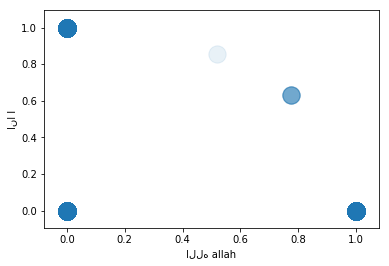

In [323]:
ax = df4.plot(kind='scatter', x='انا', y='الله', alpha=0.1, s=300)
ax.set_xlabel("الله allah")
ax.set_ylabel("انا I")

In [324]:
from sklearn.cluster import KMeans

number_of_clusters = 3
km = KMeans(n_clusters=number_of_clusters)
km.fit(X)
df4['category'] = km.labels_

In [325]:
df4.head()

,الله,انا,category
0,0.0,0.0,1
1,0.0,0.0,1
2,0.0,0.0,1
3,0.0,0.0,1
4,0.0,0.0,1


Text(0, 0.5, 'انا I')

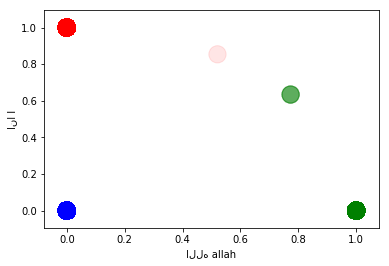

In [326]:
color_list = ['r', 'b', 'g', 'y']
colors = [color_list[i] for i in df4['category']]
ax = df4.plot(kind='scatter', x='انا', y='الله', alpha=0.1, s=300, c=colors)
ax.set_xlabel("الله allah")
ax.set_ylabel("انا I")

In [327]:
vectorizer = TfidfVectorizer(use_idf=True, max_features=3)
X = vectorizer.fit_transform(df['tweet_nostop'])
vectorizer.get_feature_names()

['الله', 'انا', 'والله']

In [328]:
df5 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
df5.head()

,الله,انا,والله
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [329]:
number_of_clusters = 4
km = KMeans(n_clusters=number_of_clusters)
km.fit(X)
df5['category'] = km.labels_

In [330]:
df5.head()

,الله,انا,والله,category
0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0


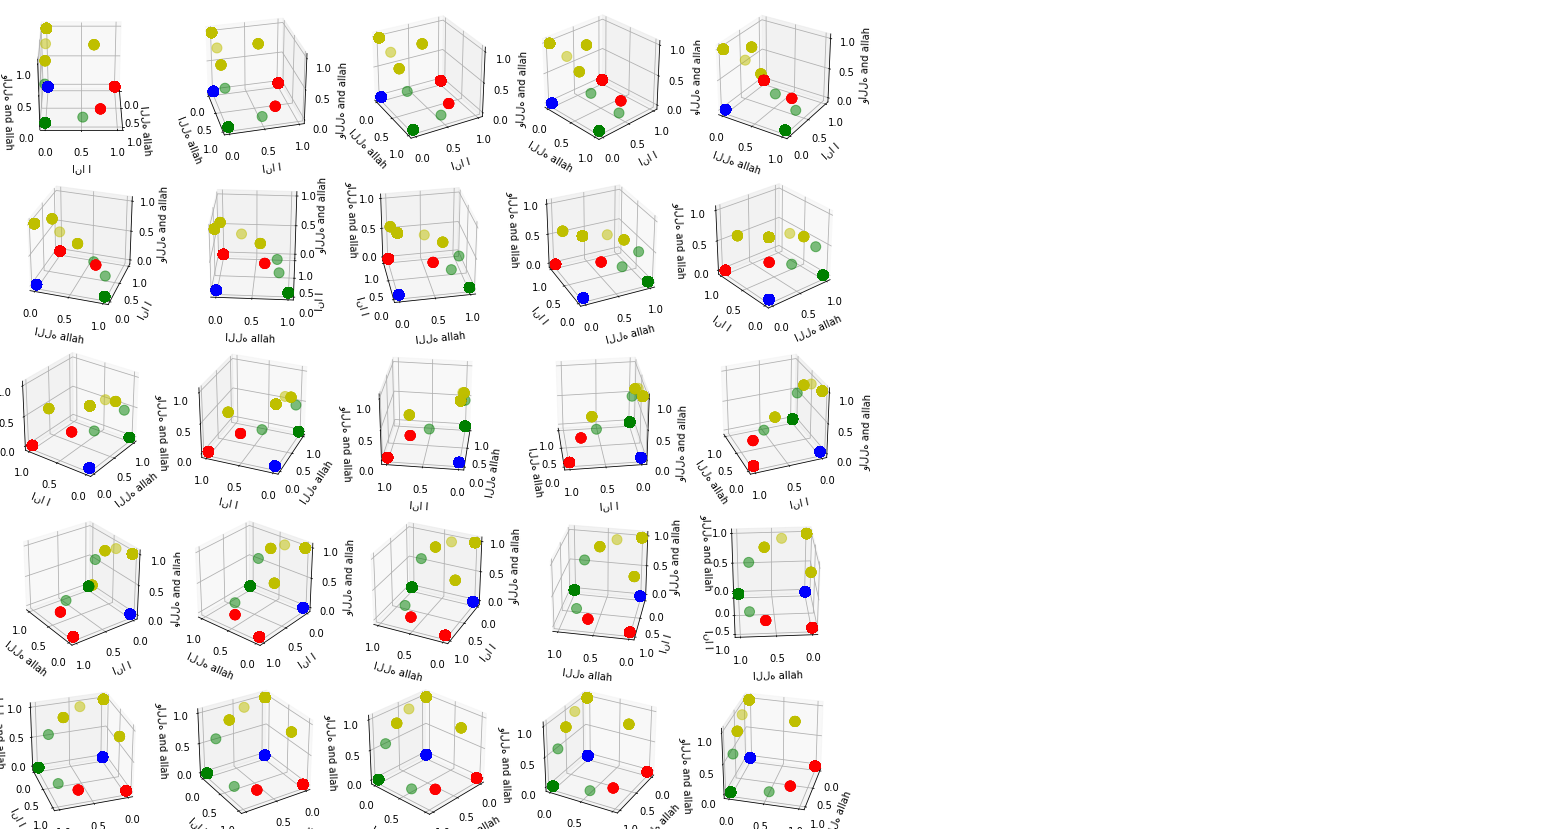

In [266]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def draw(ax, df5):
    color_list = ['r', 'b', 'g', 'y']
    colors = [color_list[i] for i in df5['category']]

    marker_list = ['o', 'x', 'v', 'X']
    markers = [marker_list[i] for i in df5['category']]

    ax.scatter(df5['الله'], df5['انا'], df5['والله'], c=colors, s=100, alpha=0.5)
    ax.set_xlabel('الله allah')
    ax.set_ylabel('انا I')
    ax.set_zlabel('والله and allah')

chart_count_vert = 5
chart_count_horiz = 5
number_of_graphs = chart_count_vert * chart_count_horiz

fig = plt.figure(figsize=(3 * chart_count_horiz, 3 * chart_count_vert))

for i in range(number_of_graphs):
    ax = fig.add_subplot(chart_count_horiz, chart_count_vert, i + 1, projection='3d', azim=(-360 / number_of_graphs) * i)
    draw(ax, df5)

Resource:
- http://jonathansoma.com/lede/foundations/classes/text%20processing/tf-idf/